In [95]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import sklearn
from sklearn.model_selection import train_test_split
import librosa
from pydub import AudioSegment
from matplotlib import image
from matplotlib import pyplot
import glob
import imageio
import cv2
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.utils import to_categorical
import os
from scipy.io.wavfile import read

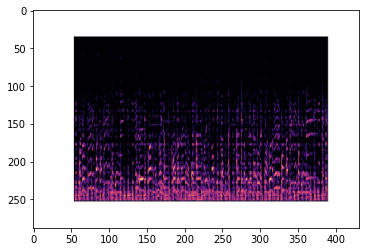

In [49]:
features = pd.read_csv("data/features_3_sec.csv")
data = imageio.imread('./Data/images_original/blues/blues00000.png')
pyplot.imshow(data)
pyplot.show()

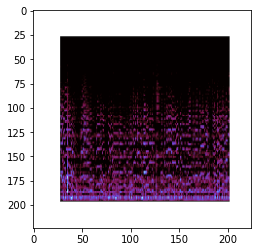

In [52]:
spectrograms = []
str_genres = []

image_dir = glob.glob("./Data/images_original/*/")
i = 0
for image_genre in image_dir:
    genre_dir = image_genre + "/*"
    images = glob.glob(genre_dir)
    genre = image_genre.split('/')
    genre = genre[-2]
    for image in images:
        spectrogram = cv2.imread(image)
        spectrogram = cv2.resize(spectrogram, (224, 224))
        pyplot.imshow(spectrogram)
        spectrogram = cv2.cvtColor(spectrogram, cv2.COLOR_BGR2RGB)
        spectrogram = spectrogram.astype(np.float32)/255
        filename = image.split('/')
        filename = filename[-1]
        if (filename == 'jazz00054.png'):
            continue
        #print(filename)
        #print(spectrogram)
        spectrograms.append(spectrogram)
        str_genres.append(genre)
        
        #spectrograms.iloc[i].spectrograms['genre'] = image_genre
        #spectrograms.iloc[i].spectrograms['spectrogram'] = image.imread('./Data/images_original/blues/blues00000.png')
        i += 1
spectrograms = np.array(spectrograms)
#str_genres = np.array(genres)


In [53]:
#load background noise files

food_court = librosa.load('data/background_noise/food-court-1.wav')
river = librosa.load('data/background_noise/river-1.wav')
spring_sounds = librosa.load('data/background_noise/spring-weather-1.wav')
traffic = librosa.load('data/background_noise/street-traffic-1.wav')

In [86]:
music = AudioSegment.from_file('data/genres_original/blues/blues.00000.wav')
background = AudioSegment.from_file('data/background_noise/spring-weather-1.wav')

test_combined = music.overlay(background) #don't need to crop?

test_combined.export("data/with_background_noise/test_combined.wav", format='wav')

<_io.BufferedRandom name='data/with_background_noise/test_combined.wav'>

Text(0.5, 1.0, 'Test Background Noise Mel Spectrogram')

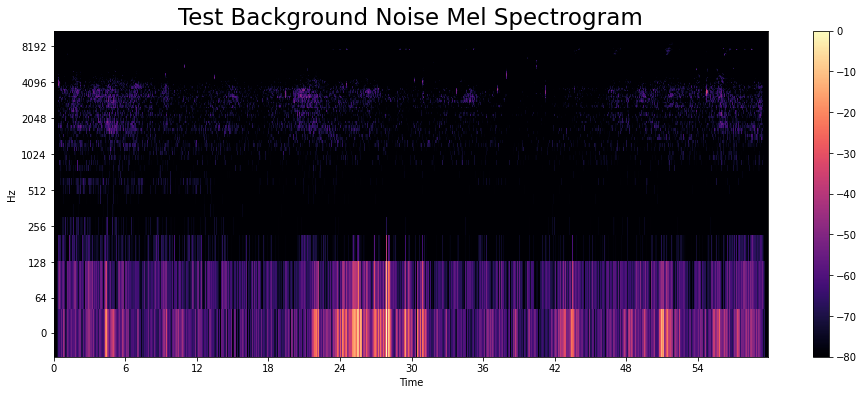

In [87]:
y, sr = spring_sounds
y, _ = librosa.effects.trim(y)


S = librosa.feature.melspectrogram(y=y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)

plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, x_axis = 'time', y_axis = 'log')
plt.colorbar()
plt.title("Test Background Noise Mel Spectrogram", fontsize = 23)


Text(0.5, 1.0, 'Test Mel Spectrogram')

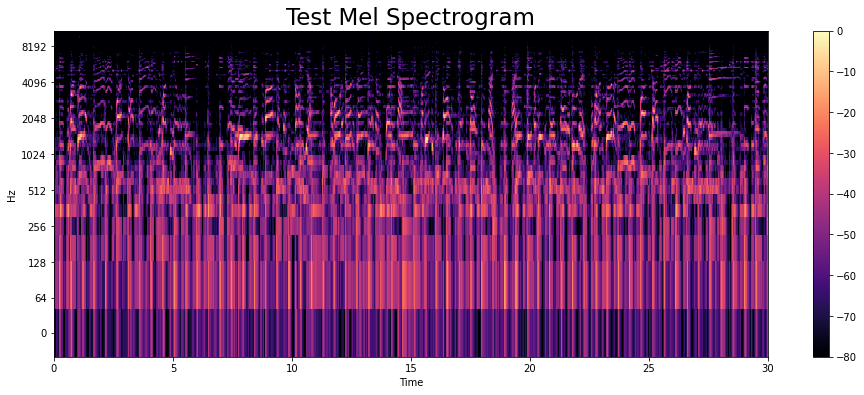

In [103]:
y, sr = librosa.load('data/genres_original/blues/blues.00000.wav')
y, _ = librosa.effects.trim(y)


S = librosa.feature.melspectrogram(y=y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)

plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, x_axis = 'time', y_axis = 'log')
plt.colorbar()
plt.title("Test Mel Spectrogram", fontsize = 23)


In [102]:
y, sr = librosa.load('data/with_background_noise/test_combined.wav')
y, _ = librosa.effects.trim(y)


S = librosa.feature.melspectrogram(y=y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)

plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, x_axis = 'time', y_axis = 'log')
plt.colorbar()
#plt.savefig("test.png")
plt.title("Test Mel Spectrogram", fontsize = 23)

/var/folders/gd/vb5r6pxx65941xwl28j3pr_c0000gn/T/ipykernel_69245/486195675.py:1: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load('data/with_background_noise/test_combined.wav')


FileNotFoundError: [Errno 2] No such file or directory: 'data/with_background_noise/test_combined.wav'

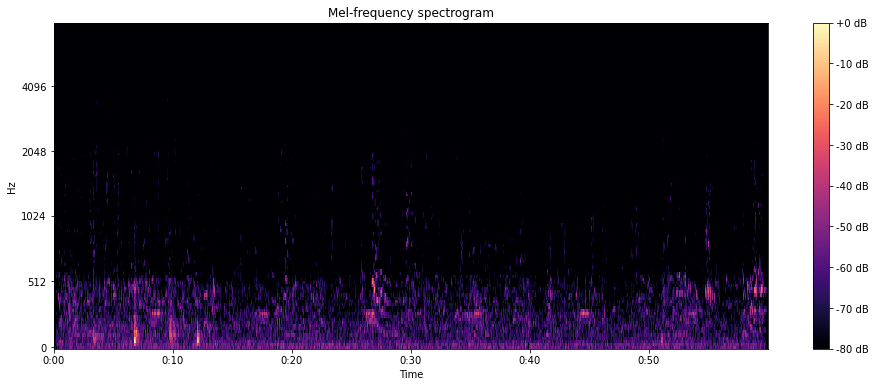

In [79]:
y, sr = food_court
y, _ = librosa.effects.trim(y)


S = librosa.feature.melspectrogram(y=y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)

# Plot the spectrogram
plt.figure(figsize=(16, 6))
librosa.display.specshow(S_DB, x_axis='time', y_axis='mel', sr=sr, fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.show()

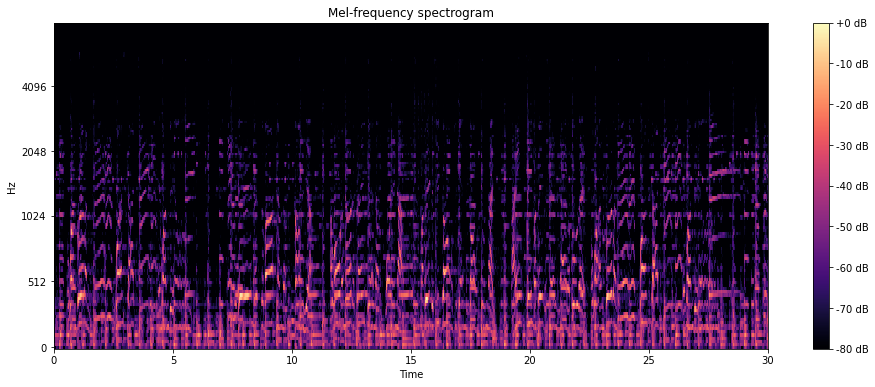

In [80]:
#testing

y, sr = librosa.load('data/genres_original/blues/blues.00000.wav')
y, _ = librosa.effects.trim(y)


S = librosa.feature.melspectrogram(y=y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)

# Plot the spectrogram
plt.figure(figsize=(16, 6))
librosa.display.specshow(S_DB, x_axis='time', y_axis='mel', sr=sr, fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.show()

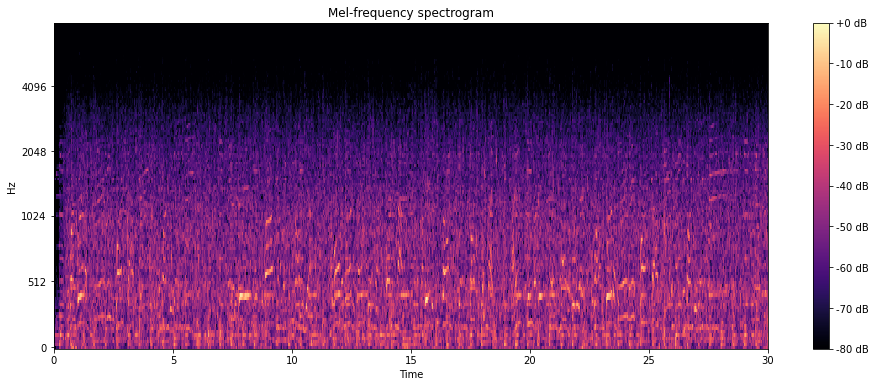

In [81]:
#testing

y, sr = librosa.load("data/with_background_noise/test_combined.wav")
y, _ = librosa.effects.trim(y)


S = librosa.feature.melspectrogram(y=y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)

# Plot the spectrogram
plt.figure(figsize=(16, 6))
librosa.display.specshow(S_DB, x_axis='time', y_axis='mel', sr=sr, fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.show()

In [ ]:
#logscaled spectrograms size 1000
#background noise audio data size 4000
#background noise spectrograms size 4000

In [118]:
#log scaled spectrogram creation

# Iterate through all the directories and files in the root directory
for subdir, dirs, files in os.walk('data/genres_original'):
    
    for dir in dirs:
        genre_path = os.path.join(subdir, dir)
        genre = os.path.basename(genre_path)
        print("Genre:", genre)

        for subdir, dirs, files in os.walk(f'data/genres_original/{genre}'):
            for file in files:
                file_path = os.path.join(subdir, file)

                #corrupt file exception
                if file_path.endswith('jazz.00054.wav'):
                    continue

                if file_path.endswith('.wav'):
                    print(file_path)
                    #get num for filename
                    basename = os.path.basename(file_path)
                    name, extension = os.path.splitext(basename)
                    prefix, number = name.split('.')

                    #create log scaled mel spectrogram
                    y, sr = librosa.load(file_path)
                    y, _ = librosa.effects.trim(y)
                    S = librosa.feature.melspectrogram(y=y, sr=sr)
                    S_DB = librosa.amplitude_to_db(S, ref=np.max)

                    #make and save fig
                    plt.figure(figsize = (16, 6))
                    librosa.display.specshow(S_DB, sr=sr, x_axis = 'time', y_axis = 'log')
                    plt.colorbar()
                    plt.savefig(f'data/log_scaled_images/{genre}/{genre}{number}.png')
                    plt.close()



Genre: pop
data/genres_original/pop/pop.00027.wav
data/genres_original/pop/pop.00033.wav
data/genres_original/pop/pop.00032.wav
data/genres_original/pop/pop.00026.wav
data/genres_original/pop/pop.00030.wav
data/genres_original/pop/pop.00024.wav
data/genres_original/pop/pop.00018.wav
data/genres_original/pop/pop.00019.wav
data/genres_original/pop/pop.00025.wav
data/genres_original/pop/pop.00031.wav
data/genres_original/pop/pop.00009.wav
data/genres_original/pop/pop.00035.wav
data/genres_original/pop/pop.00021.wav
data/genres_original/pop/pop.00020.wav
data/genres_original/pop/pop.00034.wav
data/genres_original/pop/pop.00008.wav
data/genres_original/pop/pop.00022.wav
data/genres_original/pop/pop.00036.wav
data/genres_original/pop/pop.00037.wav
data/genres_original/pop/pop.00023.wav
data/genres_original/pop/pop.00044.wav
data/genres_original/pop/pop.00050.wav
data/genres_original/pop/pop.00078.wav
data/genres_original/pop/pop.00087.wav
data/genres_original/pop/pop.00093.wav
data/genres_or

Genre: disco
data/genres_original/disco/disco.00052.wav
data/genres_original/disco/disco.00046.wav
data/genres_original/disco/disco.00091.wav
data/genres_original/disco/disco.00085.wav
data/genres_original/disco/disco.00084.wav
data/genres_original/disco/disco.00090.wav
data/genres_original/disco/disco.00047.wav
data/genres_original/disco/disco.00053.wav
data/genres_original/disco/disco.00045.wav
data/genres_original/disco/disco.00051.wav
data/genres_original/disco/disco.00079.wav
data/genres_original/disco/disco.00086.wav
data/genres_original/disco/disco.00092.wav
data/genres_original/disco/disco.00093.wav
data/genres_original/disco/disco.00087.wav
data/genres_original/disco/disco.00078.wav
data/genres_original/disco/disco.00050.wav
data/genres_original/disco/disco.00044.wav
data/genres_original/disco/disco.00068.wav
data/genres_original/disco/disco.00040.wav
data/genres_original/disco/disco.00054.wav
data/genres_original/disco/disco.00083.wav
data/genres_original/disco/disco.00097.wa

data/genres_original/blues/blues.00077.wav
data/genres_original/blues/blues.00076.wav
data/genres_original/blues/blues.00062.wav
data/genres_original/blues/blues.00089.wav
data/genres_original/blues/blues.00048.wav
data/genres_original/blues/blues.00074.wav
data/genres_original/blues/blues.00060.wav
data/genres_original/blues/blues.00061.wav
data/genres_original/blues/blues.00075.wav
data/genres_original/blues/blues.00049.wav
Genre: reggae
data/genres_original/reggae/reggae.00080.wav
data/genres_original/reggae/reggae.00094.wav
data/genres_original/reggae/reggae.00043.wav
data/genres_original/reggae/reggae.00057.wav
data/genres_original/reggae/reggae.00056.wav
data/genres_original/reggae/reggae.00042.wav
data/genres_original/reggae/reggae.00095.wav
data/genres_original/reggae/reggae.00081.wav
data/genres_original/reggae/reggae.00097.wav
data/genres_original/reggae/reggae.00083.wav
data/genres_original/reggae/reggae.00054.wav
data/genres_original/reggae/reggae.00040.wav
data/genres_orig

data/genres_original/classical/classical.00011.wav
data/genres_original/classical/classical.00039.wav
data/genres_original/classical/classical.00015.wav
data/genres_original/classical/classical.00001.wav
data/genres_original/classical/classical.00029.wav
data/genres_original/classical/classical.00028.wav
data/genres_original/classical/classical.00000.wav
data/genres_original/classical/classical.00014.wav
data/genres_original/classical/classical.00002.wav
data/genres_original/classical/classical.00016.wav
data/genres_original/classical/classical.00017.wav
data/genres_original/classical/classical.00003.wav
data/genres_original/classical/classical.00058.wav
data/genres_original/classical/classical.00064.wav
data/genres_original/classical/classical.00070.wav
data/genres_original/classical/classical.00071.wav
data/genres_original/classical/classical.00065.wav
data/genres_original/classical/classical.00059.wav
data/genres_original/classical/classical.00073.wav
data/genres_original/classical/

data/genres_original/hiphop/hiphop.00093.wav
data/genres_original/hiphop/hiphop.00092.wav
data/genres_original/hiphop/hiphop.00086.wav
data/genres_original/hiphop/hiphop.00079.wav
data/genres_original/hiphop/hiphop.00051.wav
data/genres_original/hiphop/hiphop.00045.wav
data/genres_original/hiphop/hiphop.00048.wav
data/genres_original/hiphop/hiphop.00060.wav
data/genres_original/hiphop/hiphop.00074.wav
data/genres_original/hiphop/hiphop.00075.wav
data/genres_original/hiphop/hiphop.00061.wav
data/genres_original/hiphop/hiphop.00049.wav
data/genres_original/hiphop/hiphop.00077.wav
data/genres_original/hiphop/hiphop.00063.wav
data/genres_original/hiphop/hiphop.00088.wav
data/genres_original/hiphop/hiphop.00089.wav
data/genres_original/hiphop/hiphop.00062.wav
data/genres_original/hiphop/hiphop.00076.wav
data/genres_original/hiphop/hiphop.00072.wav
data/genres_original/hiphop/hiphop.00066.wav
data/genres_original/hiphop/hiphop.00099.wav
data/genres_original/hiphop/hiphop.00098.wav
data/genre

data/genres_original/jazz/jazz.00077.wav
data/genres_original/jazz/jazz.00063.wav
data/genres_original/jazz/jazz.00067.wav
data/genres_original/jazz/jazz.00073.wav
data/genres_original/jazz/jazz.00098.wav
data/genres_original/jazz/jazz.00099.wav
data/genres_original/jazz/jazz.00072.wav
data/genres_original/jazz/jazz.00066.wav
data/genres_original/jazz/jazz.00058.wav
data/genres_original/jazz/jazz.00070.wav
data/genres_original/jazz/jazz.00064.wav
data/genres_original/jazz/jazz.00065.wav
data/genres_original/jazz/jazz.00071.wav
data/genres_original/jazz/jazz.00059.wav
data/genres_original/jazz/jazz.00040.wav
data/genres_original/jazz/jazz.00068.wav
data/genres_original/jazz/jazz.00097.wav
data/genres_original/jazz/jazz.00083.wav
data/genres_original/jazz/jazz.00082.wav
data/genres_original/jazz/jazz.00096.wav
data/genres_original/jazz/jazz.00069.wav
data/genres_original/jazz/jazz.00041.wav
data/genres_original/jazz/jazz.00055.wav
data/genres_original/jazz/jazz.00043.wav
data/genres_orig

In [ ]:
#test mel spectrograms vs regular spectrograms

In [ ]:
#create background noise data

#iterate through background noise files
    #iterate through genre folders
        #iterate through songs
            #create combined wav
            #num = 00000 + i
            #save to new folder data/audio_with_background_noise/{background_noise_type}/{genre}/{genre}.num_background.wav
            #create log scaled spectrogram of combined wav
            #save to new folder data/images_with_background_noise/{background_noise_type}/{genre}/{genre}.{num}_background.png
            

In [ ]:
#test mel spectrograms vs overlayed with each file type